# Lab 5 | EDA & Visualization

## Task A

In [1]:
import pandas as pd
df = pd.read_csv("../data/students.csv")
df.head()

,student_id,age,gpa,gender,major,year
0,1,14,NaN,F,Economics,freshman
1,2,17,2.92,M,History,senior
2,3,17,2.97,F,Physics,senior
3,4,16,2.76,F,Physics,junior
4,5,16,2.24,M,Chemistry,junior


## Task B

In [2]:
df.info()
df.isna().sum()
print(type(df["major"]))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   student_id  100 non-null    int64  
 1   age         100 non-null    int64  
 2   gpa         90 non-null     float64
 3   gender      100 non-null    object 
 4   major       95 non-null     object 
 5   year        100 non-null    object 
dtypes: float64(1), int64(2), object(3)
memory usage: 4.8+ KB
<class 'pandas.core.series.Series'>


The column with the most missing values is the GPA column. One reason this might be is because some of the students are too young and don't have a GPA yet. Other reasons include that some students may have chosen to not report their GPA or may not have GPA at their school (if these students are not all from the same school).

## Task C

In [ ]:
age_count = df["age"].count()
age_mean = df["age"].mean()
age_median = df["age"].median()
age_variance = df["age"].var()
age_sd = df["age"].std()
age_min = df["age"].min()
age_max = df["age"].max()



gpa_count = df["gpa"].count()
gpa_mean = df["gpa"].mean()
gpa_median = df["gpa"].median()
gpa_variance = df["gpa"].var()
gpa_sd = df["gpa"].std()
gpa_min = df["gpa"].min()
gpa_max = df["gpa"].max()

data = {
    'Stat': ['Count', 'Mean', 'Median', 'Variance', 'Standard Deviation', 'Min', 'Max'],
    'Age': [age_count, age_mean, age_median, age_variance, age_sd, age_min, age_max],
    'GPA': [gpa_count, gpa_mean, gpa_median, gpa_variance, gpa_sd, gpa_min, gpa_max]

}

summary = pd.DataFrame(data)
print(summary)

                 Stat        Age        GPA
0               Count  100.00000  90.000000
1                Mean   16.13000   2.624667
2              Median   16.00000   2.665000
3            Variance    1.89202   0.227432
4  Standard Deviation   16.13000   2.624667
5                 Min   14.00000   1.630000
6                 Max   18.00000   3.930000


## Task D

Text(0.5, 1.0, 'Age Frequencies')

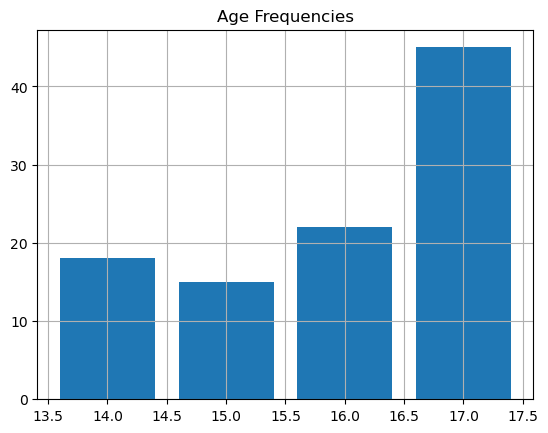

In [4]:
df["age"].hist(bins=range(14, 19), align="left", rwidth=0.8).set_title("Age Frequencies")


<Axes: xlabel='gpa', ylabel='Count'>

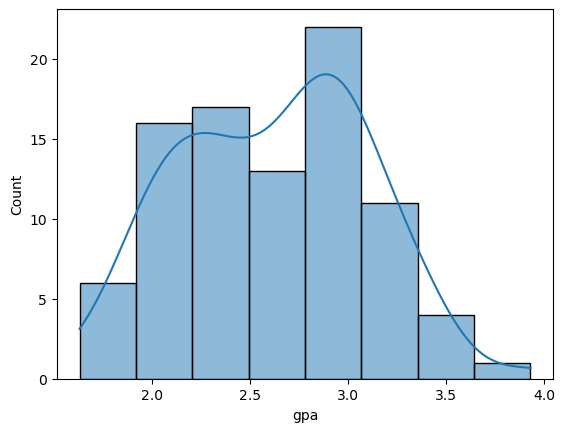

In [5]:
import seaborn as sns
sns.histplot(df["gpa"], kde=True)

#### Interesting Features for Above Graphs

The histogram of ages is interesting because it is skewed to the left, showing that there tends to be more older students. The histogram of GPA with seaborn is interesting because it appears to have a large range and have higher frequencies closer to the mean GPA, although it is not quite normal because there are more low GPAs than high GPAs. I also like the design of the seaborn histogram because it shows a line with the histogram for better clarity and interpretability.

## Task E

0.8786075344584666


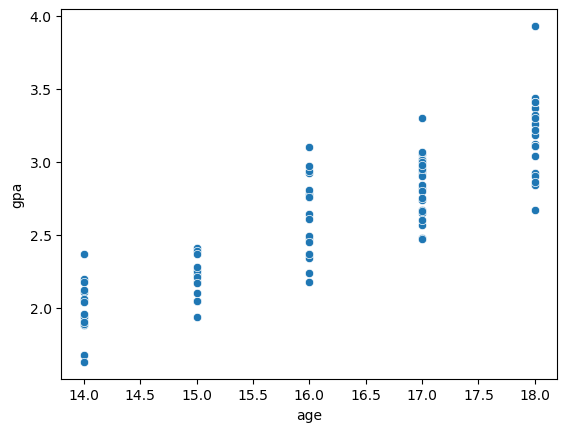

In [ ]:
sns.scatterplot(x="age",y="gpa", data=df)
corr = df["age"].corr(df["gpa"])
#print(corr)

#Observation: the Pearson correlation (r) seems pretty high, the GPA tends to trend up with age in this mini-dataset (positive correlation)

## Task F

In [7]:

df["major"] = df["major"].str.lower()
df["major"] = df["major"].str.strip()
df["major"] = df["major"].replace('', pd.NA)
df["major"] = df["major"].dropna()
print(df["major"])

0            economics
1              history
2              physics
3              physics
4            chemistry
            ...       
95                 art
96                 art
97    computer science
98      computer scien
99             biology
Name: major, Length: 100, dtype: object


## Task G

In [8]:
df.to_csv("../data/students_clean.csv", index=False)

### *Conclusion*

This lab was a great introduction to data analysis including cleaning and visualizing data. I really enjoyed going step by step plotting the data, analyzing and interpreting it, and then cleaning it to produce a cleaned dataset. Some findings I found interesting:

1. Age and GPA have a positive correlation - this does make sense as students get older, they tend to learn more and improve their study skills, helping them improve their grades and their overall academic performance.

2. Based on initial impression, the ```sns.histplot``` seems to look more visually appealing than ```df.hist()```. This is because of the labels on the axes, less grid-based design, and matching line that are featured in the seaborn histogram.

3. ```pd.NA``` can be used instead of ```np.nan``` (pandas vs numpy) which allows the program to not have to import numpy.